# Dataset download from Kaglle:## https://www.kaggle.com/datasets/bhavinmoriya/usa-housingein a single transaction.

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('float_format', '{:.2f}'.format)
us_housing = pd.read_csv('USA_Housing.csv')
us_housing

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.46,5.68,7.01,4.09,23086.80,1059033.56,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64,6.00,6.73,3.09,40173.07,1505890.91,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.07,5.87,8.51,5.13,36882.16,1058987.99,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24,7.19,5.59,3.26,34310.24,1260616.81,USS Barnett\nFPO AP 44820
4,59982.20,5.04,7.84,4.23,26354.11,630943.49,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94,7.83,6.14,3.46,22837.36,1060193.79,USNS Williams\nFPO AP 30153-7653
4996,78491.28,7.00,6.58,4.02,25616.12,1482617.73,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.69,7.25,4.81,2.13,33266.15,1030729.58,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33,5.53,7.13,5.44,42625.62,1198656.87,USS Wallace\nFPO AE 73316


##### Extract the State in each address in a new column

In [3]:
#we are going to extract the state for the Address column
import re

def extract_state_from_address(address):
    # Define a regular expression pattern to match the state abbreviation
    state_pattern = r'\b[A-Z]{2}\b' 
    # Search for the state abbreviation in the address
    state_match = re.search(state_pattern, address)
    # If a match is found, return the state abbreviation
    if state_match:
        return state_match.group(0)
    else:
        return None  # Return None if no state abbreviation is found

# Apply the extract_state_from_address function to the Address column
us_housing['State'] = us_housing['Address'].apply(extract_state_from_address)
us_housing

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,State
0,79545.46,5.68,7.01,4.09,23086.80,1059033.56,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",NE
1,79248.64,6.00,6.73,3.09,40173.07,1505890.91,"188 Johnson Views Suite 079\nLake Kathleen, CA...",CA
2,61287.07,5.87,8.51,5.13,36882.16,1058987.99,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",WI
3,63345.24,7.19,5.59,3.26,34310.24,1260616.81,USS Barnett\nFPO AP 44820,AP
4,59982.20,5.04,7.84,4.23,26354.11,630943.49,USNS Raymond\nFPO AE 09386,AE
...,...,...,...,...,...,...,...,...
4995,60567.94,7.83,6.14,3.46,22837.36,1060193.79,USNS Williams\nFPO AP 30153-7653,AP
4996,78491.28,7.00,6.58,4.02,25616.12,1482617.73,"PSC 9258, Box 8489\nAPO AA 42991-3352",AA
4997,63390.69,7.25,4.81,2.13,33266.15,1030729.58,"4215 Tracy Garden Suite 076\nJoshualand, VA 01...",VA
4998,68001.33,5.53,7.13,5.44,42625.62,1198656.87,USS Wallace\nFPO AE 73316,AE


In [4]:
us_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
 7   State                         5000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 312.6+ KB


##### Great!! We have a column State. Price of house can changed based on state. This column is important to predict house based on the states you are searching for. 

In [5]:
# copy the dataset without the Address column. We are not going to use that column in our machine learning. 
df_copy = us_housing.drop("Address", axis=1).copy()
df_copy.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,State
0,79545.46,5.68,7.01,4.09,23086.80,1059033.56,NE
1,79248.64,6.00,6.73,3.09,40173.07,1505890.91,CA
2,61287.07,5.87,8.51,5.13,36882.16,1058987.99,WI
3,63345.24,7.19,5.59,3.26,34310.24,1260616.81,AP
4,59982.20,5.04,7.84,4.23,26354.11,630943.49,AE


##### Round the columns Avg. Area House Age, Avg. Area Number of Rooms, and Avg. Area Number of Bedrooms.This will make our calaculation easier instead of getting the average of them.

In [6]:
#round the numbers on columns "Avg. Area House Age", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms"
columns_to_round = ["Avg. Area House Age", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms"]
df_copy[columns_to_round] = df_copy[columns_to_round].apply(lambda x: round(x))
df_copy.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,State
0,79545.46,6.00,7.00,4.00,23086.80,1059033.56,NE
1,79248.64,6.00,7.00,3.00,40173.07,1505890.91,CA
2,61287.07,6.00,9.00,5.00,36882.16,1058987.99,WI
3,63345.24,7.00,6.00,3.00,34310.24,1260616.81,AP
4,59982.20,5.00,8.00,4.00,26354.11,630943.49,AE


In [7]:
#check the amount of data in each values for the columns "Avg. Area House Age", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms"
df_copy["Avg. Area House Age"].value_counts(),df_copy["Avg. Area Number of Rooms"].value_counts(),df_copy["Avg. Area Number of Bedrooms"].value_counts()

(Avg. Area House Age
 6.00     1924
 5.00     1229
 7.00     1168
 4.00      323
 8.00      302
 3.00       31
 9.00       22
 10.00       1
 Name: count, dtype: int64,
 Avg. Area Number of Rooms
 7.00     1891
 6.00     1225
 8.00     1221
 5.00      302
 9.00      293
 4.00       39
 10.00      27
 3.00        1
 11.00       1
 Name: count, dtype: int64,
 Avg. Area Number of Bedrooms
 4.00    1482
 3.00    1476
 2.00     828
 6.00     624
 5.00     590
 Name: count, dtype: int64)

In [8]:
df_copy.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,68583.11,5.97,6.99,3.74,36163.52,1232072.65
std,10657.99,1.04,1.04,1.23,9925.65,353117.63
min,17796.63,3.00,3.00,2.00,172.61,15938.66
25%,61480.56,5.00,6.00,3.00,29403.93,997577.14
50%,68804.29,6.00,7.00,4.00,36199.41,1232669.38
75%,75783.34,7.00,8.00,4.00,42861.29,1471210.20
max,107701.75,10.00,11.00,6.00,69621.71,2469065.59


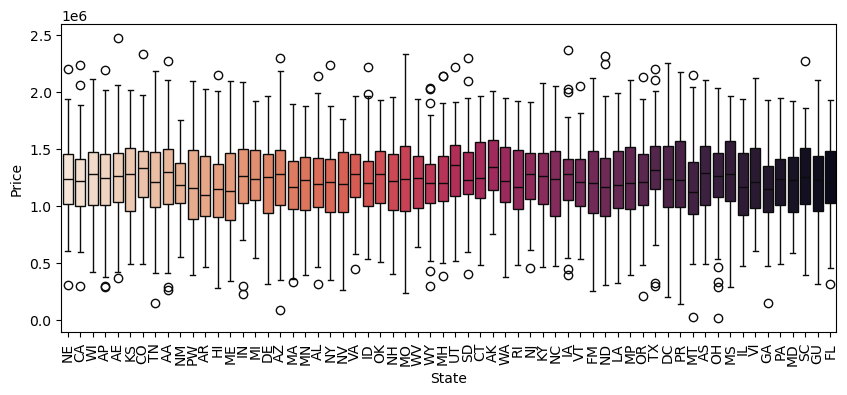

In [9]:
#create a boxplot to verified the outliers in each state 
plt.subplots(figsize=(10,4))
ax = sns.boxplot(x="State", y="Price", data=df_copy,palette="rocket_r")
plt.xticks(rotation=90);

In [10]:
#group the state values to analyze the data
stateGrouped = df_copy.groupby("State").sum()
stateGrouped.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
State,,,,,,
AA,12257541.29,1063.00,1267.00,680.00,6411162.38,223481178.09
AE,11564571.87,988.00,1167.00,641.00,6182946.46,209943638.51
AK,4745516.97,401.00,476.00,264.00,2478335.77,89600985.68
AL,4750921.51,414.00,489.00,245.00,2520773.99,84776664.90
AP,11611112.02,1011.00,1190.00,620.00,6287958.25,209334849.04


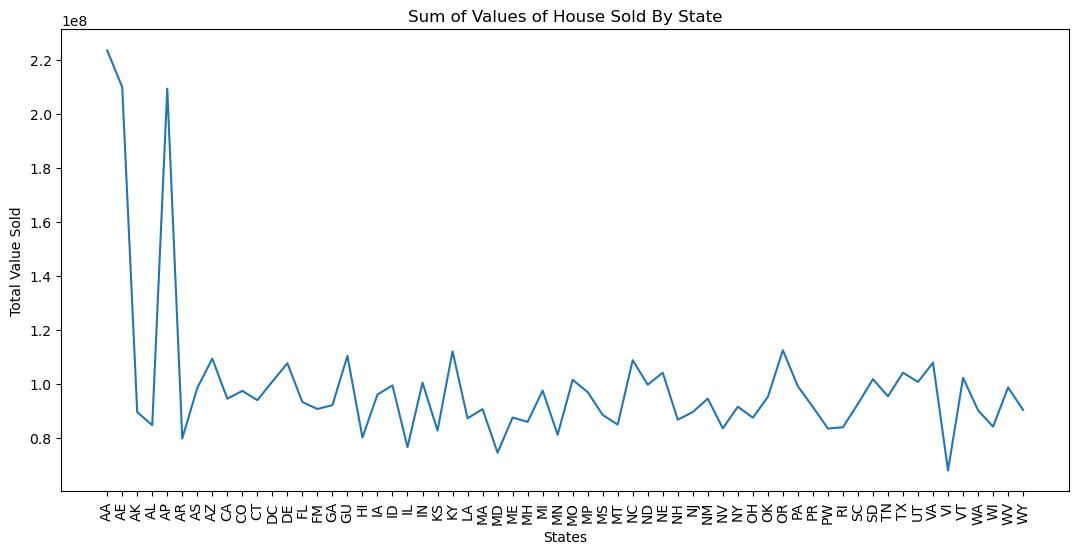

In [11]:
#plot a graphic to check the sum of house solb by state
stateGrouped.Price.plot(figsize=(13,6))
plt.xticks(range(len(stateGrouped.index)), stateGrouped.index)
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("Total Value Sold")
plt.title("Sum of Values of House Sold By State")
plt.show();

##### On the graphic above we cold verified there are 3 states selling more houses than others. 
##### Armed Forces Americas (except Canada) = AA,
##### Armed Forces Pacific = AP
##### Armed Forces Canada = AE

##### Transform categorical variables into numerical

In [12]:
#verifying the numbers of unique values
df_copy.State.unique()

array(['NE', 'CA', 'WI', 'AP', 'AE', 'KS', 'CO', 'TN', 'AA', 'NM', 'PW',
       'AR', 'HI', 'ME', 'IN', 'MI', 'DE', 'AZ', 'MA', 'MN', 'AL', 'NY',
       'NV', 'VA', 'ID', 'OK', 'NH', 'MO', 'WV', 'WY', 'MH', 'UT', 'SD',
       'CT', 'AK', 'WA', 'RI', 'NJ', 'KY', 'NC', 'IA', 'VT', 'FM', 'ND',
       'LA', 'MP', 'OR', 'TX', 'DC', 'PR', 'MT', 'AS', 'OH', 'MS', 'IL',
       'VI', 'GA', 'PA', 'MD', 'SC', 'GU', 'FL'], dtype=object)

In [13]:
df_copy.State.value_counts().head(30)

State
AA    177
AP    170
AE    167
GU     91
OR     91
KY     89
NC     89
DE     89
VT     86
AZ     86
VA     85
NE     84
ND     84
ID     81
WV     81
MO     81
DC     81
PA     81
IN     80
SD     80
GA     80
NM     79
TX     78
AS     78
CA     78
MP     78
UT     77
MA     77
NY     77
TN     77
Name: count, dtype: int64

##### Transform categorical variable into numerial

In [14]:
#Apply Ordinal Encoder to transforma categorical to numerical
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df_copy["State"] = encoder.fit_transform(df_copy[["State"]])
df_copy.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,State
0,79545.46,6.00,7.00,4.00,23086.80,1059033.56,37.00
1,79248.64,6.00,7.00,3.00,40173.07,1505890.91,8.00
2,61287.07,6.00,9.00,5.00,36882.16,1058987.99,59.00
3,63345.24,7.00,6.00,3.00,34310.24,1260616.81,4.00
4,59982.20,5.00,8.00,4.00,26354.11,630943.49,1.00


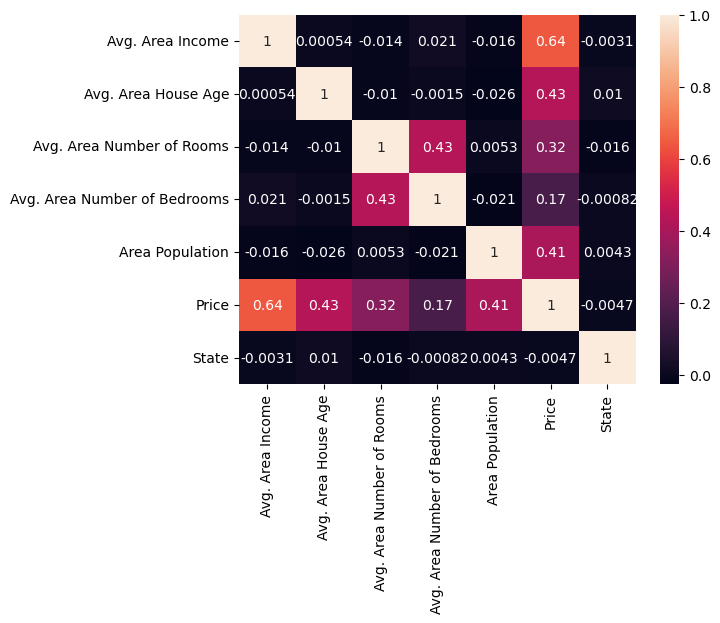

In [15]:
# Check the data correlation 
sns.heatmap(df_copy.corr(),annot=True);

##### Split data and normalize X data

In [16]:
#after we split the data into variable and target, we normalize only the X data
y = df_copy["Price"]
X = df_copy.drop("Price", axis=1)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X,y

(array([[0.68682217, 0.42857143, 0.5       , 0.5       , 0.3299422 ,
         0.60655738],
        [0.68352073, 0.42857143, 0.5       , 0.25      , 0.57596801,
         0.13114754],
        [0.48373705, 0.42857143, 0.75      , 0.75      , 0.52858204,
         0.96721311],
        ...,
        [0.50713527, 0.57142857, 0.25      , 0.        , 0.47651494,
         0.90163934],
        [0.55841872, 0.42857143, 0.5       , 0.75      , 0.61128233,
         0.01639344],
        [0.53071451, 0.42857143, 0.5       , 0.5       , 0.66708815,
         0.67213115]]),
 0      1059033.56
 1      1505890.91
 2      1058987.99
 3      1260616.81
 4       630943.49
           ...    
 4995   1060193.79
 4996   1482617.73
 4997   1030729.58
 4998   1198656.87
 4999   1298950.48
 Name: Price, Length: 5000, dtype: float64)

In [17]:
#after split data we can apply train_test_split by using 30% for test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### Select the regression models and apply training and score on all of them. We are picking the 3 best results and try to improve them. 

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet

models = {"Linear Regression": LinearRegression(),
         "Decision Tree Regressor": DecisionTreeRegressor(),
         "Lasso": Lasso(),
         "Ridge": Ridge(),
         "GradientBoosting":GradientBoostingRegressor(),
         "RandomForestRegressor": RandomForestRegressor(),
         "XGBoost":XGBRegressor()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [19]:
%%time
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

CPU times: total: 3.56 s
Wall time: 1.74 s


{'Linear Regression': 0.8849817964236434,
 'Decision Tree Regressor': 0.6850032612998092,
 'Lasso': 0.8849823794771947,
 'Ridge': 0.8848101855107026,
 'GradientBoosting': 0.873739397034602,
 'RandomForestRegressor': 0.8471470815946388,
 'XGBoost': 0.8513180670048874}

##### based on the models results, we are gonna try to improve the Linear Regression, Lasso, and Ridge.

## Hyperparameter tuning with RandomizedSearchCV

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics

In [21]:
def evaluate_regression_model(y_true, y_pred, model_name):
    # Calculate various regression metrics
    rmse = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
#    mse = metrics.mean_squared_error(y_true, y_pred)
    mae = metrics.mean_absolute_error(y_true, y_pred)
    medae = metrics.median_absolute_error(y_true, y_pred)
    evs = metrics.explained_variance_score(y_true, y_pred)*100
    r2 = metrics.r2_score(y_true, y_pred) *100
    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        "Model": [model_name],
        "Root Mean Square Error": rmse,
#        "Mean Square Error": mse,
        "Mean Absolute Error": mae,
        "Median Absolute Error":medae,
        "Explained Variance Score": evs,
        "R2 Score": r2
    })

    return results_df

### Linear Regression

In [22]:
#improve Linear regression and check is model improved
LR_model = LinearRegression(n_jobs = -1)

LR_model.fit(X_train, y_train)

scoreLR = LR_model.score(X_test,y_test)
scoreLR

0.8849817964236434

In [23]:
#predict the 
LR_predict = LR_model.predict(X_test)
LR_predict

array([1250219.02756201, 1246060.67227014, 1301693.30926849, ...,
       1501482.99463437, 1551856.39396814,  954975.80769986])

In [24]:
LR_dataframe = evaluate_regression_model(y_test, LR_predict, "Linear Regression")
LR_dataframe

,Model,Root Mean Square Error,Mean Absolute Error,Median Absolute Error,Explained Variance Score,R2 Score
0,Linear Regression,116504.66,93742.48,81368.28,88.50,88.50


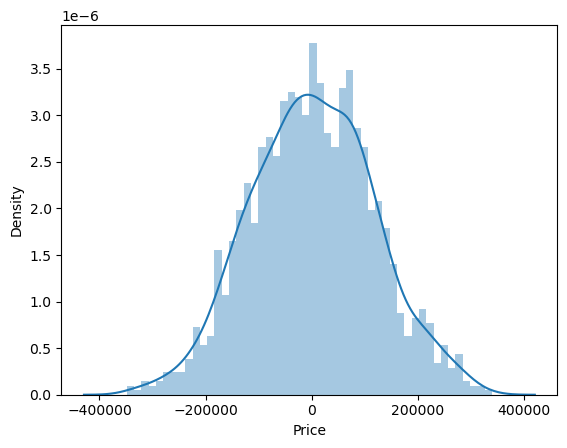

In [25]:
sns.distplot((y_test-LR_predict), bins=50);

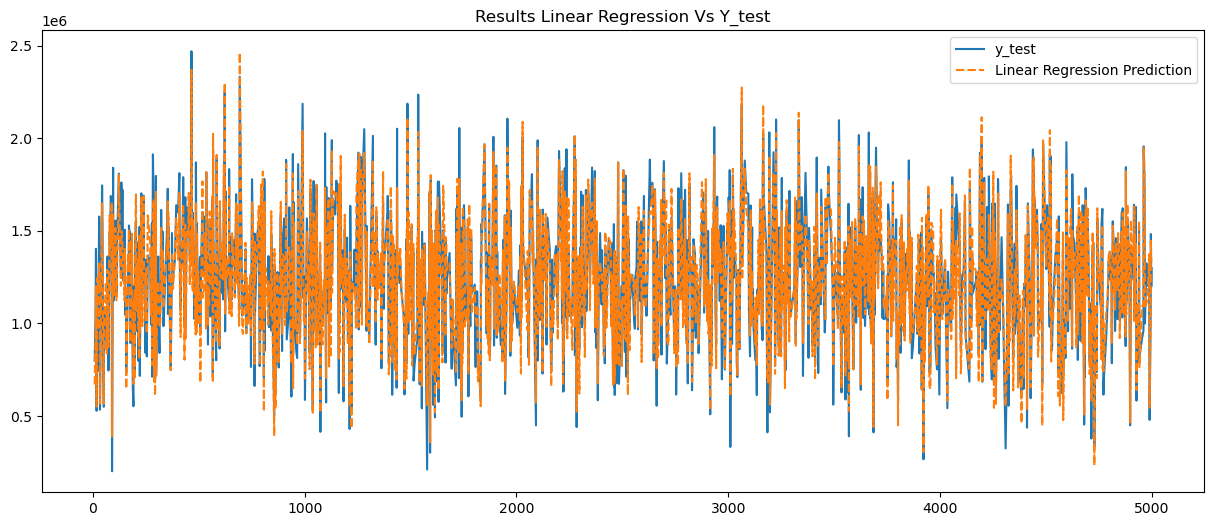

In [26]:
aux_tableLR = pd.DataFrame()
aux_tableLR["y_test"] = y_test
aux_tableLR["Linear Regression Prediction"] = LR_predict

plt.figure(figsize=(15,6))
plt.title("Results Linear Regression Vs Y_test")
sns.lineplot(data=aux_tableLR)
plt.show()

In [27]:
aux_tableLR

,y_test,Linear Regression Prediction
1501,1339096.08,1250219.03
2586,1251794.18,1246060.67
2653,1340094.97,1301693.31
1055,1431507.62,1184145.16
705,1042373.52,969368.10
...,...,...
3563,1348221.77,1401462.90
1538,1309937.40,1107620.45
1837,1472887.25,1501482.99
2380,1409762.12,1551856.39


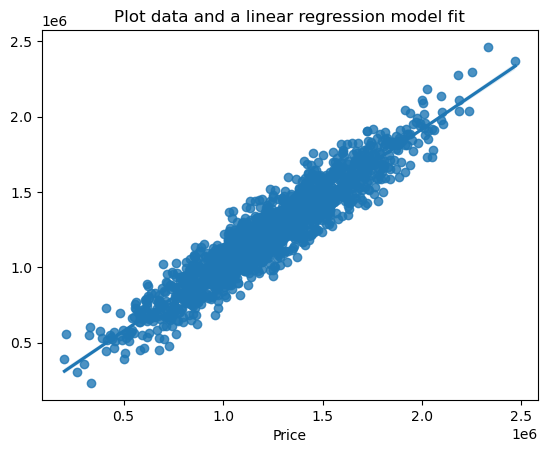

In [28]:
sns.regplot(x = y_test, y = LR_predict, data = [y_test,LR_predict])
plt.title("Plot data and a linear regression model fit");

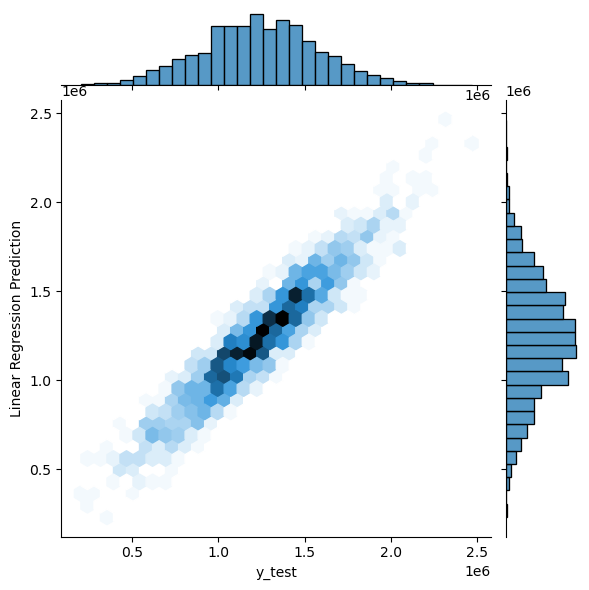

In [29]:
sns.jointplot(x="y_test", y="Linear Regression Prediction", data=aux_tableLR, kind ='hex');

### Lasso

In [30]:
%%time

lasso_grid = {"max_iter": np.arange(200, 500, 800),
             "warm_start": (False, True),
             "positive": (False, True),
             "selection": ("cyclic", "random")
             }

lasso_model = RandomizedSearchCV(Lasso(),
                                param_distributions= lasso_grid,
                                n_iter=50,
                                cv=5,
                                verbose=True)

lasso_model.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 78.1 ms
Wall time: 81.5 ms


RandomizedSearchCV(cv=5, estimator=Lasso(), n_iter=50,
                   param_distributions={'max_iter': array([200]),
                                        'positive': (False, True),
                                        'selection': ('cyclic', 'random'),
                                        'warm_start': (False, True)},
                   verbose=True)

In [31]:
lasso_model.best_params_

{'warm_start': False, 'selection': 'random', 'positive': True, 'max_iter': 200}

In [32]:
lasso_model = Lasso(max_iter = 200,
                   warm_start = True,
                   selection = 'random',
                   positive = True)

lasso_model.fit(X_train,y_train)

Lasso(max_iter=200, positive=True, selection='random', warm_start=True)

In [33]:
scoreLasso = lasso_model.score(X_test,y_test)
print(f"The score after tuning hyperparameters is {scoreLasso:.5f}. \nThe original Lasso model score is 0.88498. This means the original Lasso model scores better by {(scoreLasso - 0.8849823794771947):.5f}.")

The score after tuning hyperparameters is 0.88496. 
The original Lasso model score is 0.88498. This means the original Lasso model scores better by -0.00003.


In [34]:
lasso_predict = lasso_model.predict(X_test)
lasso_predict

array([1248795.74642216, 1247627.99124796, 1299721.58844279, ...,
       1503046.09677712, 1551320.85702453,  953708.9072034 ])

In [35]:
lasso_dataframe = evaluate_regression_model(y_test, lasso_predict, "Lasso")
lasso_dataframe

,Model,Root Mean Square Error,Mean Absolute Error,Median Absolute Error,Explained Variance Score,R2 Score
0,Lasso,116518.08,93737.89,81065.86,88.50,88.50


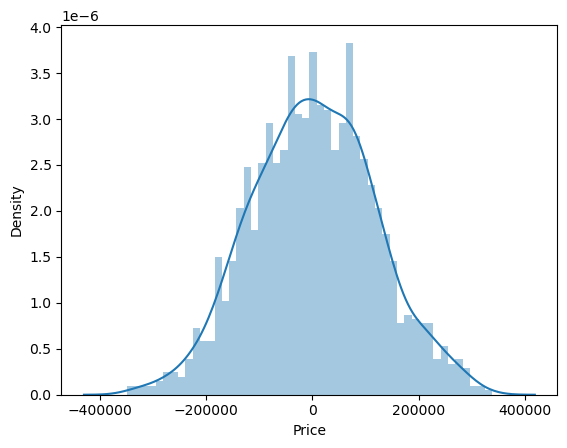

In [36]:
sns.distplot((y_test-lasso_predict), bins=50);

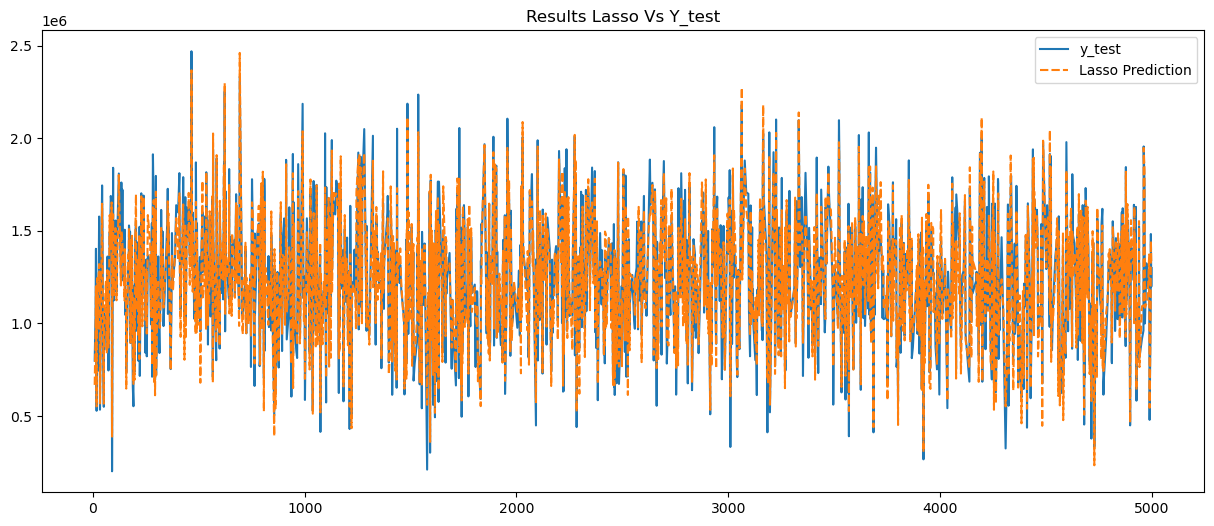

In [37]:
aux_tableLasso = pd.DataFrame()
aux_tableLasso["y_test"] = y_test
aux_tableLasso["Lasso Prediction"] = lasso_predict

plt.figure(figsize=(15,6))
plt.title("Results Lasso Vs Y_test")
sns.lineplot(data=aux_tableLasso)
plt.show()

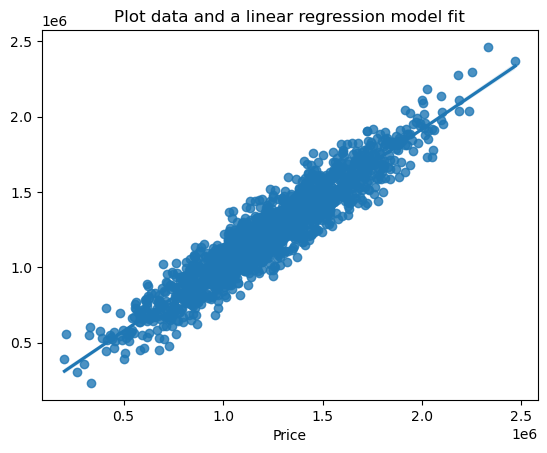

In [38]:
sns.regplot(x = y_test, y = LR_predict, data = [y_test,LR_predict])
plt.title("Plot data and a linear regression model fit");

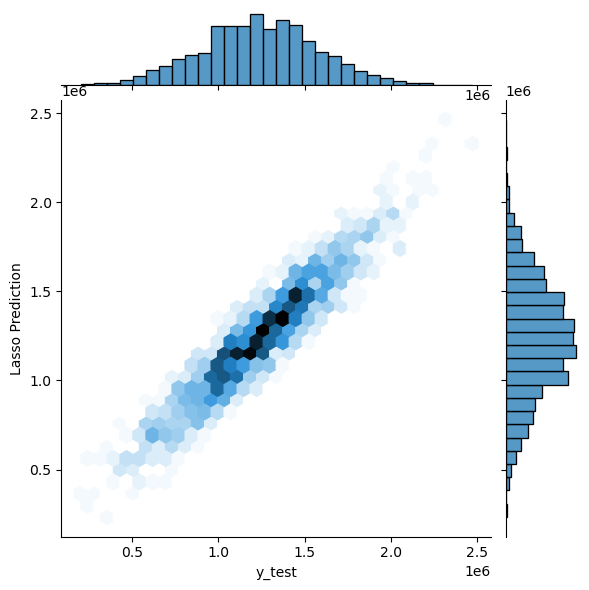

In [39]:
sns.jointplot(x="y_test", y="Lasso Prediction", data=aux_tableLasso, kind ='hex');

### Ridge

In [40]:
%%time

ridge_grid = {
    "max_iter": np.arange(200, 500, 100),
    "solver": ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    "positive": [False, True]
}


ridge_model = RandomizedSearchCV(Ridge(),
                                param_distributions= ridge_grid,
                                n_iter=20,
                                cv=5,
                                verbose=True)

ridge_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 1.31 s
Wall time: 242 ms


RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=20,
                   param_distributions={'max_iter': array([200, 300, 400]),
                                        'positive': [False, True],
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga', 'lbfgs']},
                   verbose=True)

In [41]:
ridge_model.best_params_

{'solver': 'lbfgs', 'positive': True, 'max_iter': 200}

In [42]:
ridge_model = Ridge(solver='auto',
                   positive=True,
                   max_iter=400)

ridge_model.fit(X_train,y_train)

Ridge(max_iter=400, positive=True)

In [43]:
scoreRidge = ridge_model.score(X_test,y_test)
print(f"The score after tuning hyperparameters is {scoreRidge:.5f}. \nThe original Ridge model score is 0.88481. This means the original Lasso model scores better by {(scoreRidge - 0.8848101855107026):.5f}.")

The score after tuning hyperparameters is 0.88478. 
The original Ridge model score is 0.88481. This means the original Lasso model scores better by -0.00003.


In [44]:
ridge_predict = ridge_model.predict(X_test)
ridge_predict

array([1249394.21351312, 1248001.02091559, 1296963.31927492, ...,
       1498237.74146403, 1548322.55113517,  956198.08594906])

In [45]:
ridge_dataframe = evaluate_regression_model(y_test, ridge_predict, "Ridge")
ridge_dataframe

,Model,Root Mean Square Error,Mean Absolute Error,Median Absolute Error,Explained Variance Score,R2 Score
0,Ridge,116606.67,93799.95,79039.30,88.48,88.48


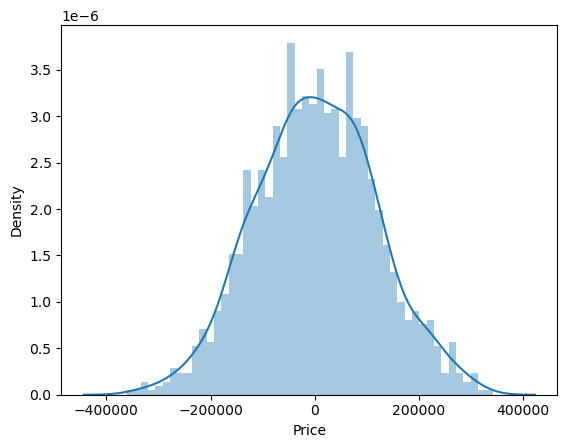

In [46]:
sns.distplot((y_test-ridge_predict), bins=50);

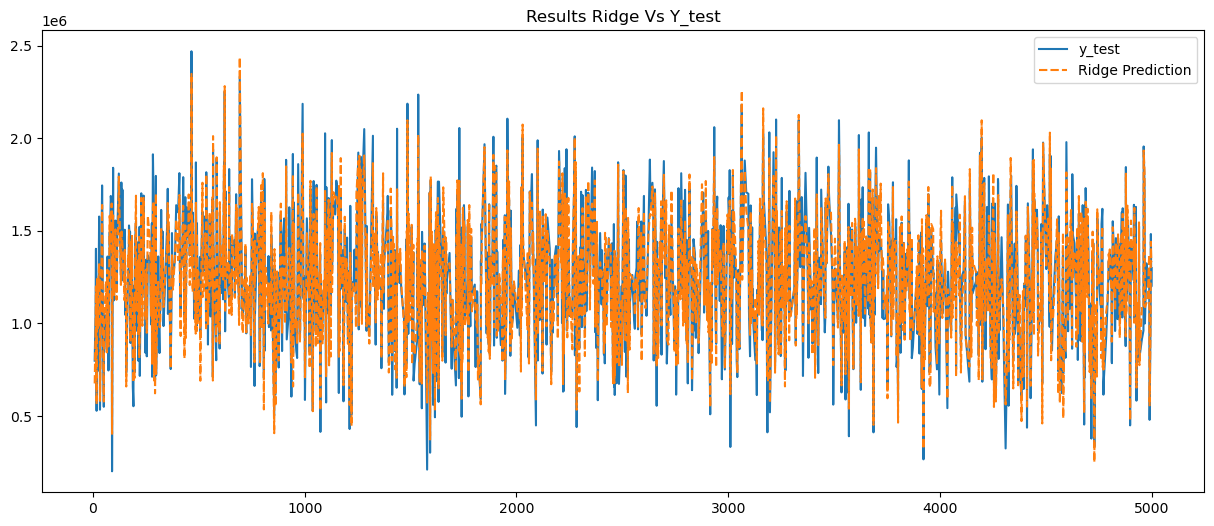

In [47]:
aux_tableRidge = pd.DataFrame()
aux_tableRidge["y_test"] = y_test
aux_tableRidge["Ridge Prediction"] = ridge_predict

plt.figure(figsize=(15,6))
plt.title("Results Ridge Vs Y_test")
sns.lineplot(data=aux_tableRidge)
plt.show()

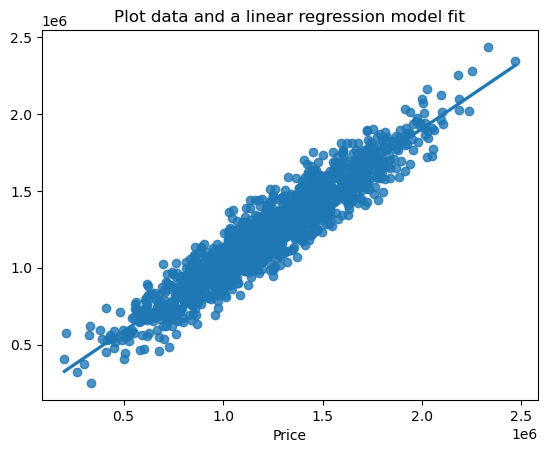

In [48]:
sns.regplot(x = y_test, y = ridge_predict, data = [y_test,ridge_predict])
plt.title("Plot data and a linear regression model fit");

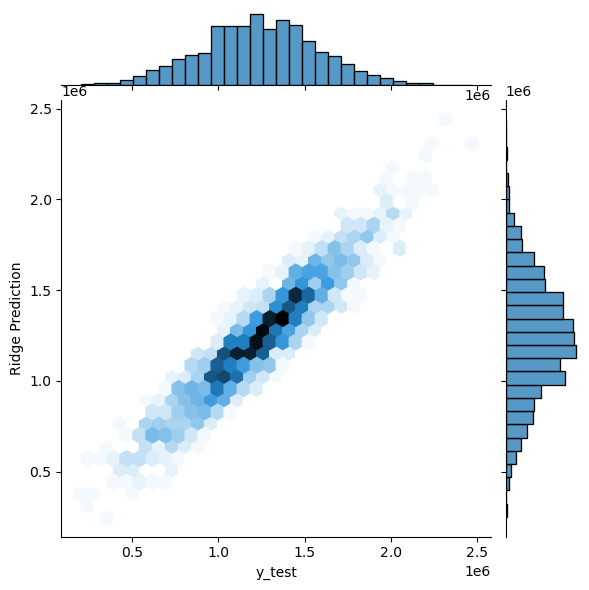

In [49]:
sns.jointplot(x="y_test", y="Ridge Prediction", data=aux_tableRidge, kind ='hex');

In [50]:
# combine the metrics of all 3 models in one dataframe
combined_metrics = pd.concat([LR_dataframe, lasso_dataframe, ridge_dataframe], ignore_index=True)
combined_metrics.set_index(combined_metrics.columns[0], inplace=True)
combined_metrics

,Root Mean Square Error,Mean Absolute Error,Median Absolute Error,Explained Variance Score,R2 Score
Model,,,,,
Linear Regression,116504.66,93742.48,81368.28,88.50,88.50
Lasso,116518.08,93737.89,81065.86,88.50,88.50
Ridge,116606.67,93799.95,79039.30,88.48,88.48


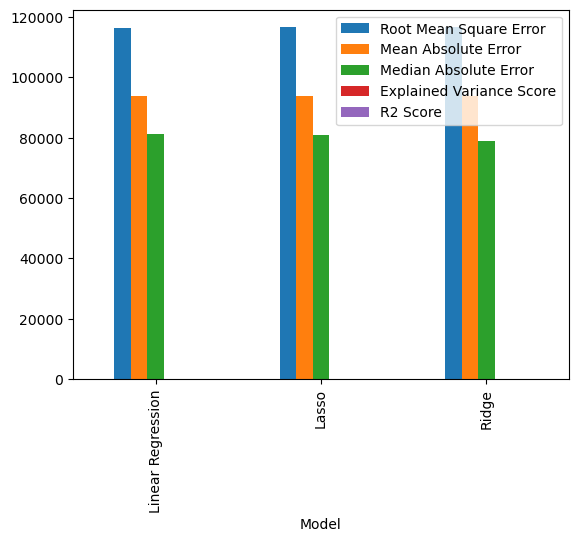

In [51]:
combined_metrics.plot(kind='bar');